In [5]:
# 🚗 Car Price Prediction using Machine Learning

This project aims to build a machine learning model to predict the price of a car based on several factors like:

- Brand goodwill
- Horsepower
- Mileage
- Fuel Type
- Transmission
- Car Age
- And more...

Car price prediction is useful for:
- Buyers and sellers to make informed decisions
- Used car marketplaces
- Car companies and loan providers

We will use **Random Forest Regression** to train the model and evaluate performance using metrics like **MAE (Mean Absolute Error)** and **R² Score**.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\archive (1)\car data.csv")
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [10]:
print(data.isnull().sum())  # Missing values are checked
print(data.dtypes)          # Data types are checked


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [11]:
print(data.isnull().sum())  # Check if there are any missing values in the dataset
print(data.dtypes)          # Check the data types of each column
print(data.describe())      # Get statistical summary of numerical columns


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900

In [27]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Asus\Downloads\archive (1)\car data.csv")

final_data = pd.get_dummies(data, drop_first=True)

if 'Unnamed: 0' in final_data.columns:
    final_data = final_data.drop(['Unnamed: 0'], axis=1)

print(final_data.head())

X = final_data.drop('Selling_Price', axis=1)
y = final_data['Selling_Price']


   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0                   0   
1  2013           4.75           9.54       43000      0                   0   
2  2017           7.25           9.85        6900      0                   0   
3  2011           2.85           4.15        5200      0                   0   
4  2014           4.60           6.87       42450      0                   0   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                   0                       0                           0   
1                   0                       0                           0   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Car_Name_Bajaj Avenger 150 street  ...  Car_Name_swif

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Print model performance (R squared score)
print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))


Train score: 0.9834127007924263
Test score: 0.9632206052631609


In [14]:
# Split the data into training and testing sets
# 80% data model training ke liye, 20% testing ke liye use hoga
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model using training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [31]:
# Train model (example)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save model and feature columns after training
import pickle
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns, f)


In [29]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, y_pred))

# Calculate and print R2 Score
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6010852459016396
R2 Score: 0.9632206052631609


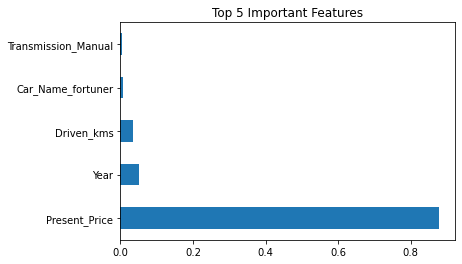

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.show()


In [22]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Data load karo
data = pd.read_csv(r"C:\Users\Asus\Downloads\archive (1)\car data.csv")

# Categorical to numeric convert karo
final_data = pd.get_dummies(data, drop_first=True)

# Agar 'Unnamed: 0' column hai to hata do
if 'Unnamed: 0' in final_data.columns:
    final_data = final_data.drop(['Unnamed: 0'], axis=1)

# Features aur target alag karo
X = final_data.drop('Selling_Price', axis=1)
y = final_data['Selling_Price']

# Train-test split karo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model banakar train karo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature columns ko save karo full path ke saath
feature_columns = X.columns
with open(r'C:\Users\Asus\feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

# Model ko save karo full path ke saath
with open(r'C:\Users\Asus\car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model aur feature columns file save ho gaye!")


Model aur feature columns file save ho gaye!


In [33]:
import pickle
import pandas as pd

# Load saved model and feature columns
with open('car_price_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('feature_columns.pkl', 'rb') as f:
    feature_columns = pickle.load(f)

# Function to get user input from console
def get_user_input():
    print("Please enter the car details:")

    Year = int(input("Year of the car (e.g., 2014): "))
    Present_Price = float(input("Present price of the car (in Lakhs, e.g., 5.59): "))
    Kms_Driven = int(input("Kms driven (e.g., 27000): "))
    Owner = int(input("Number of previous owners (e.g., 0): "))

    # Fuel type input
    fuel = input("Fuel type (Petrol/Diesel/CNG): ").strip().lower()
    Fuel_Type_Diesel = 1 if fuel == 'diesel' else 0
    Fuel_Type_Petrol = 1 if fuel == 'petrol' else 0
    # CNG means both diesel and petrol 0

    # Seller type input
    seller = input("Seller type (Dealer/Individual): ").strip().lower()
    Seller_Type_Individual = 1 if seller == 'individual' else 0

    # Transmission input
    trans = input("Transmission type (Manual/Automatic): ").strip().lower()
    Transmission_Manual = 1 if trans == 'manual' else 0

    data = {
        'Year': Year,
        'Present_Price': Present_Price,
        'Kms_Driven': Kms_Driven,
        'Owner': Owner,
        'Fuel_Type_Diesel': Fuel_Type_Diesel,
        'Fuel_Type_Petrol': Fuel_Type_Petrol,
        'Seller_Type_Individual': Seller_Type_Individual,
        'Transmission_Manual': Transmission_Manual
    }
    return data

# Get user input as dictionary
input_data = get_user_input()

# Prepare input DataFrame with all feature columns, fill missing with 0
input_df = pd.DataFrame(columns=feature_columns)
for col in feature_columns:
    input_df.loc[0, col] = input_data.get(col, 0)

# Predict car price
predicted_price = model.predict(input_df)

print(f"\nEstimated Car Selling Price: {predicted_price[0]:.2f} Lakhs")


Please enter the car details:
Year of the car (e.g., 2014): 2013
Present price of the car (in Lakhs, e.g., 5.59): 5
Kms driven (e.g., 27000): 56
Number of previous owners (e.g., 0): 1
Fuel type (Petrol/Diesel/CNG): Petrol
Seller type (Dealer/Individual): Dealer
Transmission type (Manual/Automatic): Manual

Estimated Car Selling Price: 3.10 Lakhs
